<a href="https://colab.research.google.com/github/zefanyadita/Predictive-Failure-Machine-System---Machine-Learning-Project-/blob/main/Predictive_Machine_Failure_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA LOADING**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
#Load Dataset
data = '/content/drive/MyDrive/predictive_maintenance.csv'
machine = pd.read_csv(data)
machine

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [70]:
machine.shape

(10000, 10)

Output kode memberikan informasi bahwa:
- Terdapat 10.000 baris records dalam
- Terdapat10 kolom yang terdiri dari:
UDI, Product ID, Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Target, dan Failure Type

# **EDA (Exploratory Data Analysis)**

## Deskripsi Variabel

- UID : Pengidentifikasi unik yang menunjukkan hubungan dengan peristiwa atau pengamatan tertentu dalam proses manufaktur (nilai 1 - 10.000).
- Product ID : Nomor seri khusus dari Type. Hal ini dapat mengindikasikan jenis atau variasi produk yang berbeda yang diproduksi oleh mesin.
- Type : Varian Kualitas Produk, teridir dari 3 kategori, Low (L) (50% dari seluruh produk), Medium (M) (30%), dan High (H) (20%)
- Air Temperature [K] : Suhu Udara yang dihasilkan menggunakan proses random walk kemudian dinormalisasi ke standar deviasi 2 K sekitar 300 K
- Process Temperature [K] : Suhu Proses pada mesin yang dihasilkan menggunakan proses random walk dan dinormalisasi.
- Rotational Speed [rpm] : Kecepatan rotasi mesin, yang dihitung berdasarkan daya 2860 W dan termasuk kebisingan yang terdistribusi secara normal.
- Torque [Nm] : Torsi yang diterapkan pada mesin, biasanya terdistribusi sekitar 40 Nm dengan Ïƒ = 10 Nm dan tidak ada nilai negatif.
- Tool Wear [min] : Keausan alat berhubungan dengan varian kualitas mesin (H/M/L). Hal ini menunjukkan bahwa alat digunakan bersama dengan mesin selama proses manufaktur.
- Target :  Mesin gagal atau tidak yang dinilai dengan 0 atau 1.
- Failure Type : Jenis kegagalan mesin. Jika setidaknya satu dari jenis kegagalan di berikut benar, mesin diberikan label 'kegagalan mesin' dan diatur ke 1.
  - Tool Wear Failure (TWF)
  - Heat Dissipation Failure (HDF)
  - Power Failure (PWF)
  - Overstrain Failure (OSF)
  - Random Failures (RNF)

In [71]:
machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Berdasarkan output terlihat bahwa:

- Terdapat 3 kolom dengan tipe object, yaitu:  Product ID, Type, dan Failure Type. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 3 kolom numerik dengan tipe data float64 yaitu: Air Temperatur [K], Process Temperatur [K], dan Torque [Nm].
- Terdapat 4 kolom numerik dengan tipe data int64, yaitu: UDI, Rotational speed [rpm], Tool wear [min], dan Target. Kolom Target merupakan target fitur.

In [72]:
machine.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## **Data Assesing**

###Data Duplikat

In [73]:
machine.duplicated().sum()

0

### Missing Value

In [74]:
machine.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

### Mislabelled Data

In [75]:
# Binary Target Variable - Failure / No Failure
machine.Target.value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [76]:
# Investigating the difference between No Failure labeled sample number in Target and in Type
Failure_machine = machine[['Target','Failure Type']][machine['Target'] == 0]
Failure_machine.value_counts()

Target  Failure Type   
0       No Failure         9643
        Random Failures      18
dtype: int64

In [77]:
Failure_machine_Type = machine[['Target','Failure Type']][machine['Failure Type'] == 'No Failure']
Failure_machine_Type.value_counts()

Target  Failure Type
0       No Failure      9643
1       No Failure         9
dtype: int64

Terdapat 18 data dengan Target ‘0’ namun memiliki label ‘Random Failure’ serta terdapat 9 data dengan Target ‘1’ namun memiliki label ‘No Failure’.

In [78]:
# Get instances where'Target' is 0 but Failure type is not "No Failure"
selected_instances = machine[(machine['Target'] == 0) & (machine['Failure Type'] != 'No Failure')]
selected_instances

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [79]:
# Get instances where'Target' is 1 but Failure type is not "No Failure"
selected_instances1 = machine[(machine['Target'] == 1) & (machine['Failure Type'] == 'No Failure')]
selected_instances1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


Metode yang digunakan untuk mengatasi mislabelled data adalah dengan melakukan pengakategorian antara ‘Target’ dan Failure Type’.

In [80]:
# Change the values in 'Target' from 0 to 1 where 'Failure_Type' is 'random'
machine.loc[machine['Failure Type'] == 'Random Failures', 'Target'] = 1
machine.loc[machine['Failure Type'] == 'No Failure', 'Target'] = 0

In [81]:
machine.Target.value_counts()

0    9652
1     348
Name: Target, dtype: int64

In [82]:
Failure_machine_Type = machine[['Target','Failure Type']][machine['Failure Type'] == 'No Failure']
Failure_machine_Type.value_counts()

Target  Failure Type
0       No Failure      9652
dtype: int64

In [83]:
machine["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

### Outliers

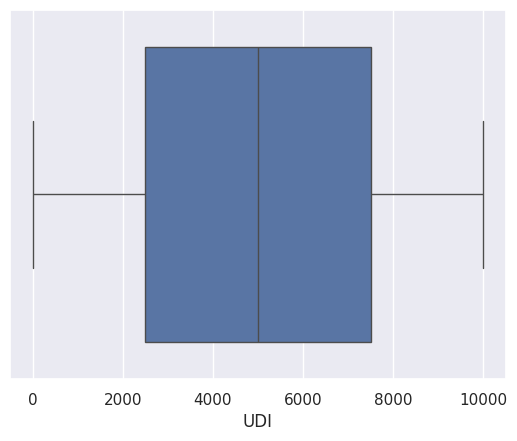

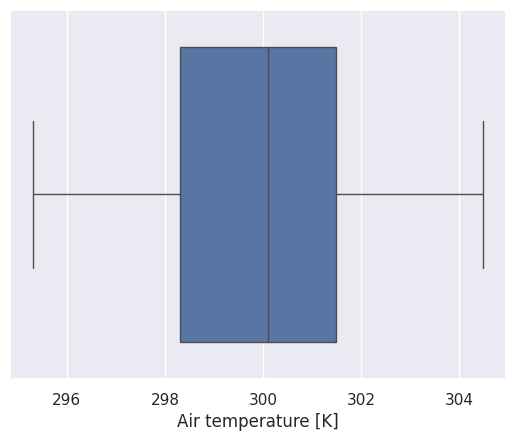

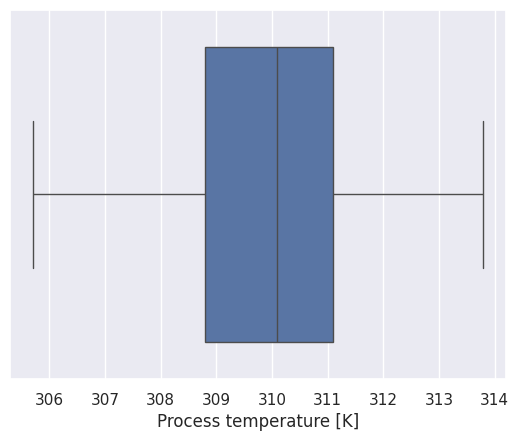

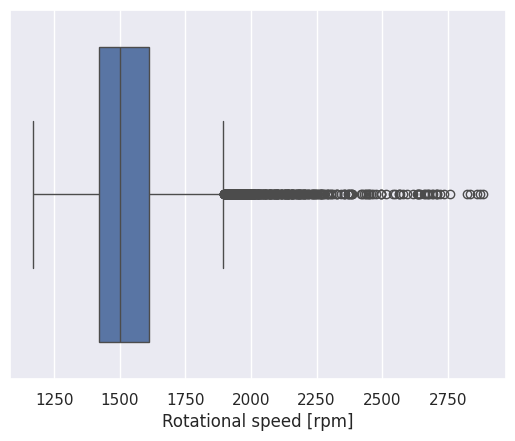

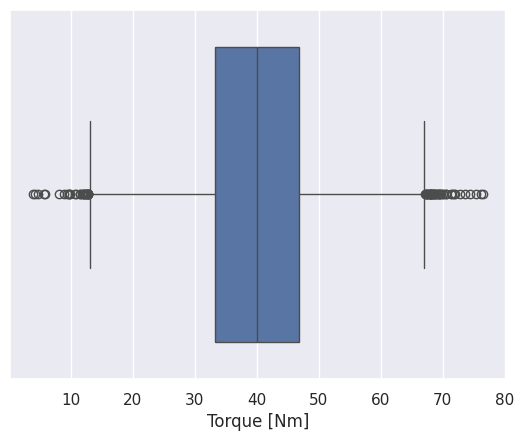

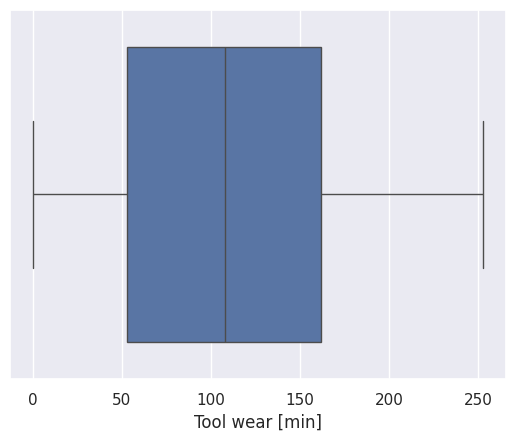

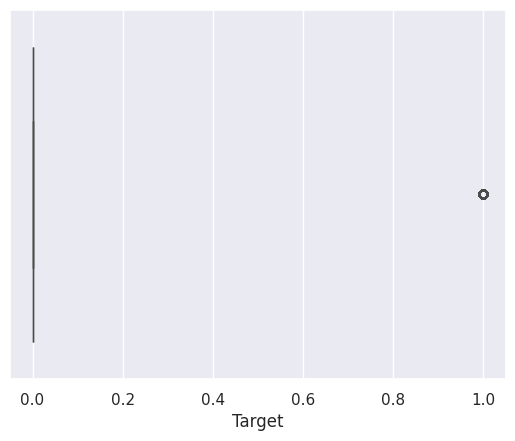

In [84]:
machine1 = machine.select_dtypes(exclude=['object'])
for column in machine1:
        plt.figure()
        sns.boxplot(data = machine1, x = column)

Sementara itu, penanganan terhadap outliers tidak dilakukan karena, berdasarkan uji coba yang telah dilakukan, penangan tersebut menghilangkan data penting terkait Failure Type

## **Data Analysis**

In [ ]:
categorical_features = ['Type', 'Failure Type']
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']

### Univariate Analysis

Univariate visualization merupakan bentuk visualisasi data yang hanya merepresentasikan informasi yang terdapat pada satu variabel. Jenis visualisasi ini umumnya digunakan untuk memberikan gambaran terkait distribusi sebuah variabel dalam suatu dataset.

A. Categorical Features

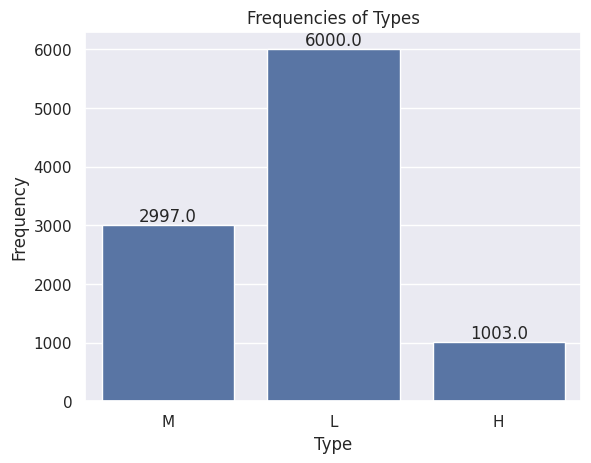

In [85]:
#TYPE
sns.countplot(x='Type', data=machine)
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Frequencies of Types')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

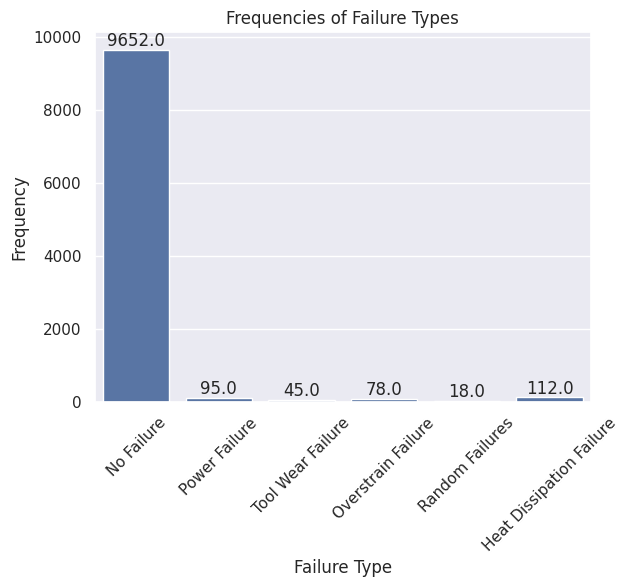

In [86]:
#FAILURE TYPE
sns.countplot(x='Failure Type', data=machine)
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

B. Numerical Features

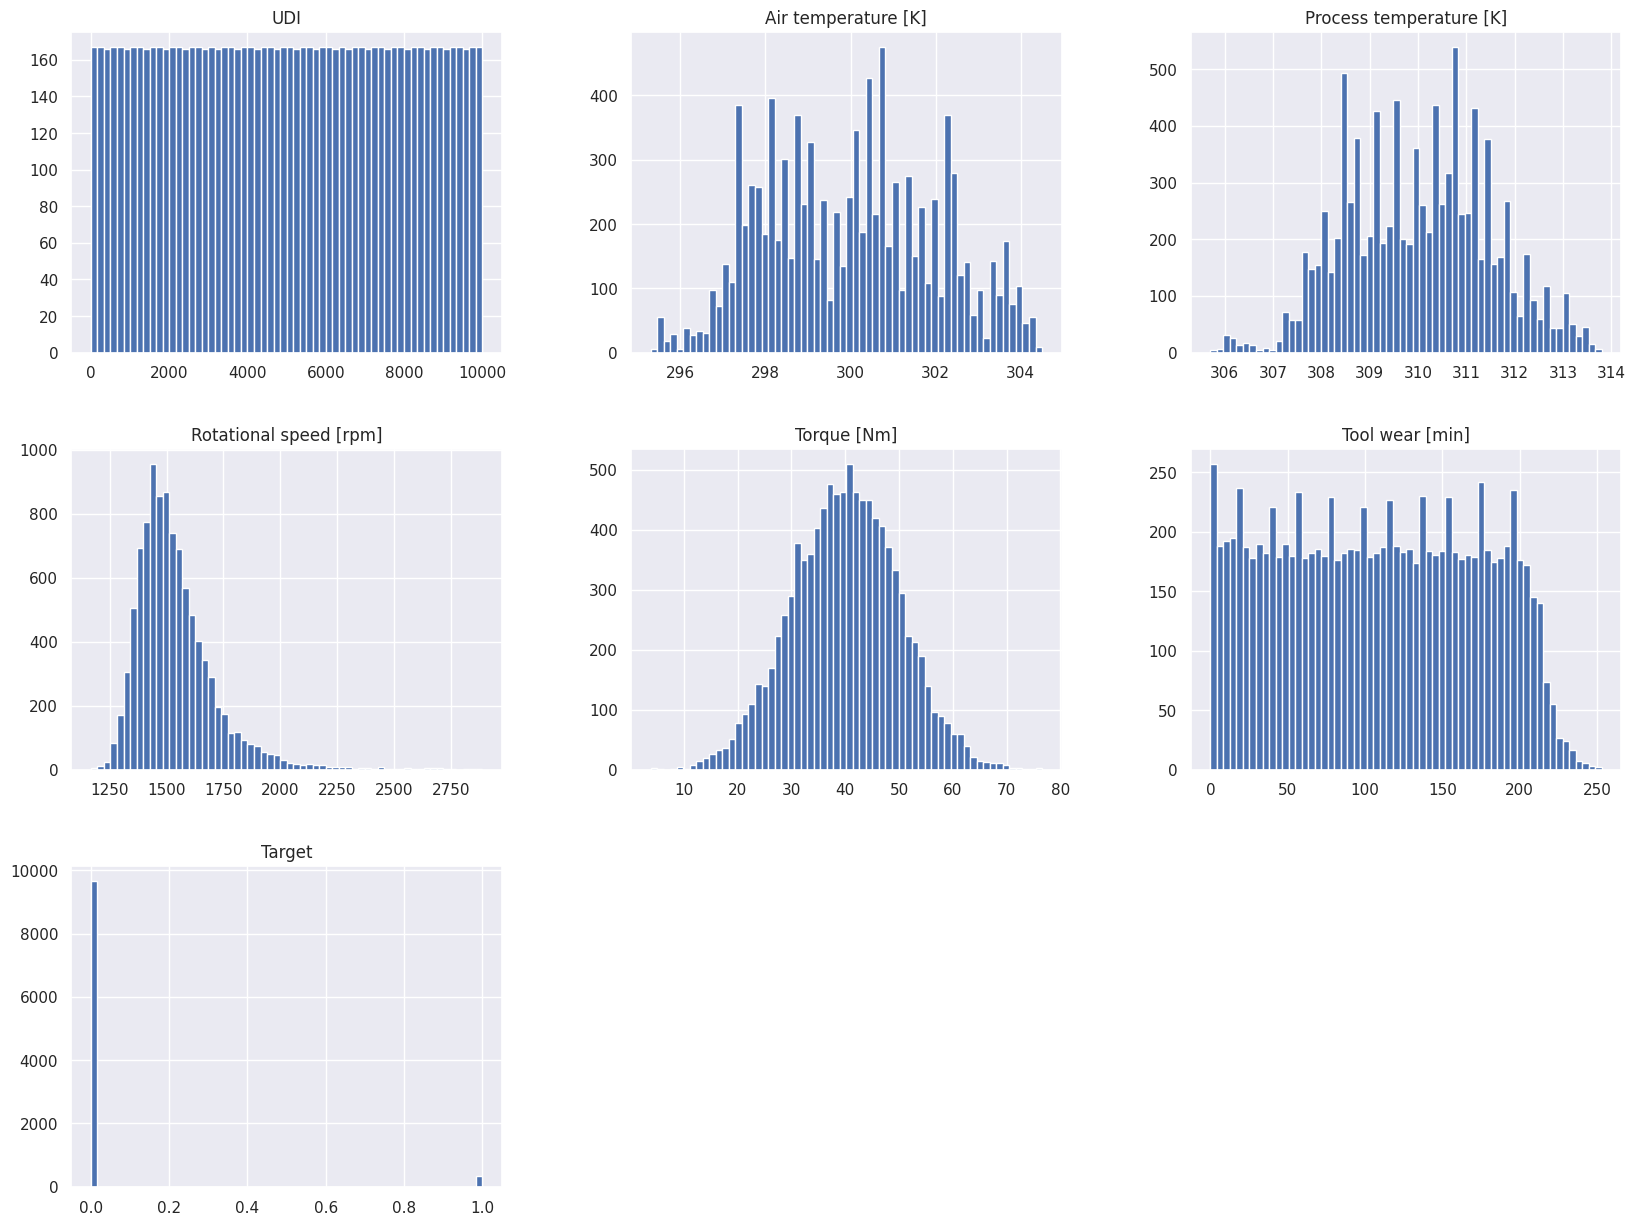

In [87]:
machine.hist(bins = 60, figsize = (20,15))
plt.show()

Berdasarkan Analsiis Univariate diatas, diketahui bahwa:
- Terdapat 6000 mesin Tipe "L" dan 3000 mesin Tipe "M" dan hampir 1000 mesin Tipe "H".
- Ada 600 mesin yang memiliki suhu udara antara 297K hingga 303K. Sisanya memiliki suhu udara yang lebih rendah selama bekerja.
- Ada lebih dari 800 mesin yang mencapai suhu proses antara 310K hingga 311K. Juga mesin lain yang suhunya berada di antara 308K hingga 312K selama pemrosesan.
- Ada 600 mesin yang mencapai putaran rotasi 1500 rpm, 500 mesin mencapai kecepatan rotasi 1400 hingga 1500 rpm, hanya ada sedikit mesin yang mencapai kecepatan rotasi maksimum 2000 rpm, mungkin kurang dari 100 mesin.
- Ada 500 mesin yang mencapai torsi antara 35Nm hingga 45Nm.
- Ada mesin yang mungkin menghadapi kegagalan karena keausan pahat (min) hingga 220 keausan pahat min.

### Bivariate Analysis

Analisis Bivariat adalah analisis statistik yang dilakukan untuk memahami hubungan antara dua variabel dalam sebuah dataset. Ini melibatkan memeriksa hubungan atau ketergantungan antara dua variabel secara bersama-sama.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


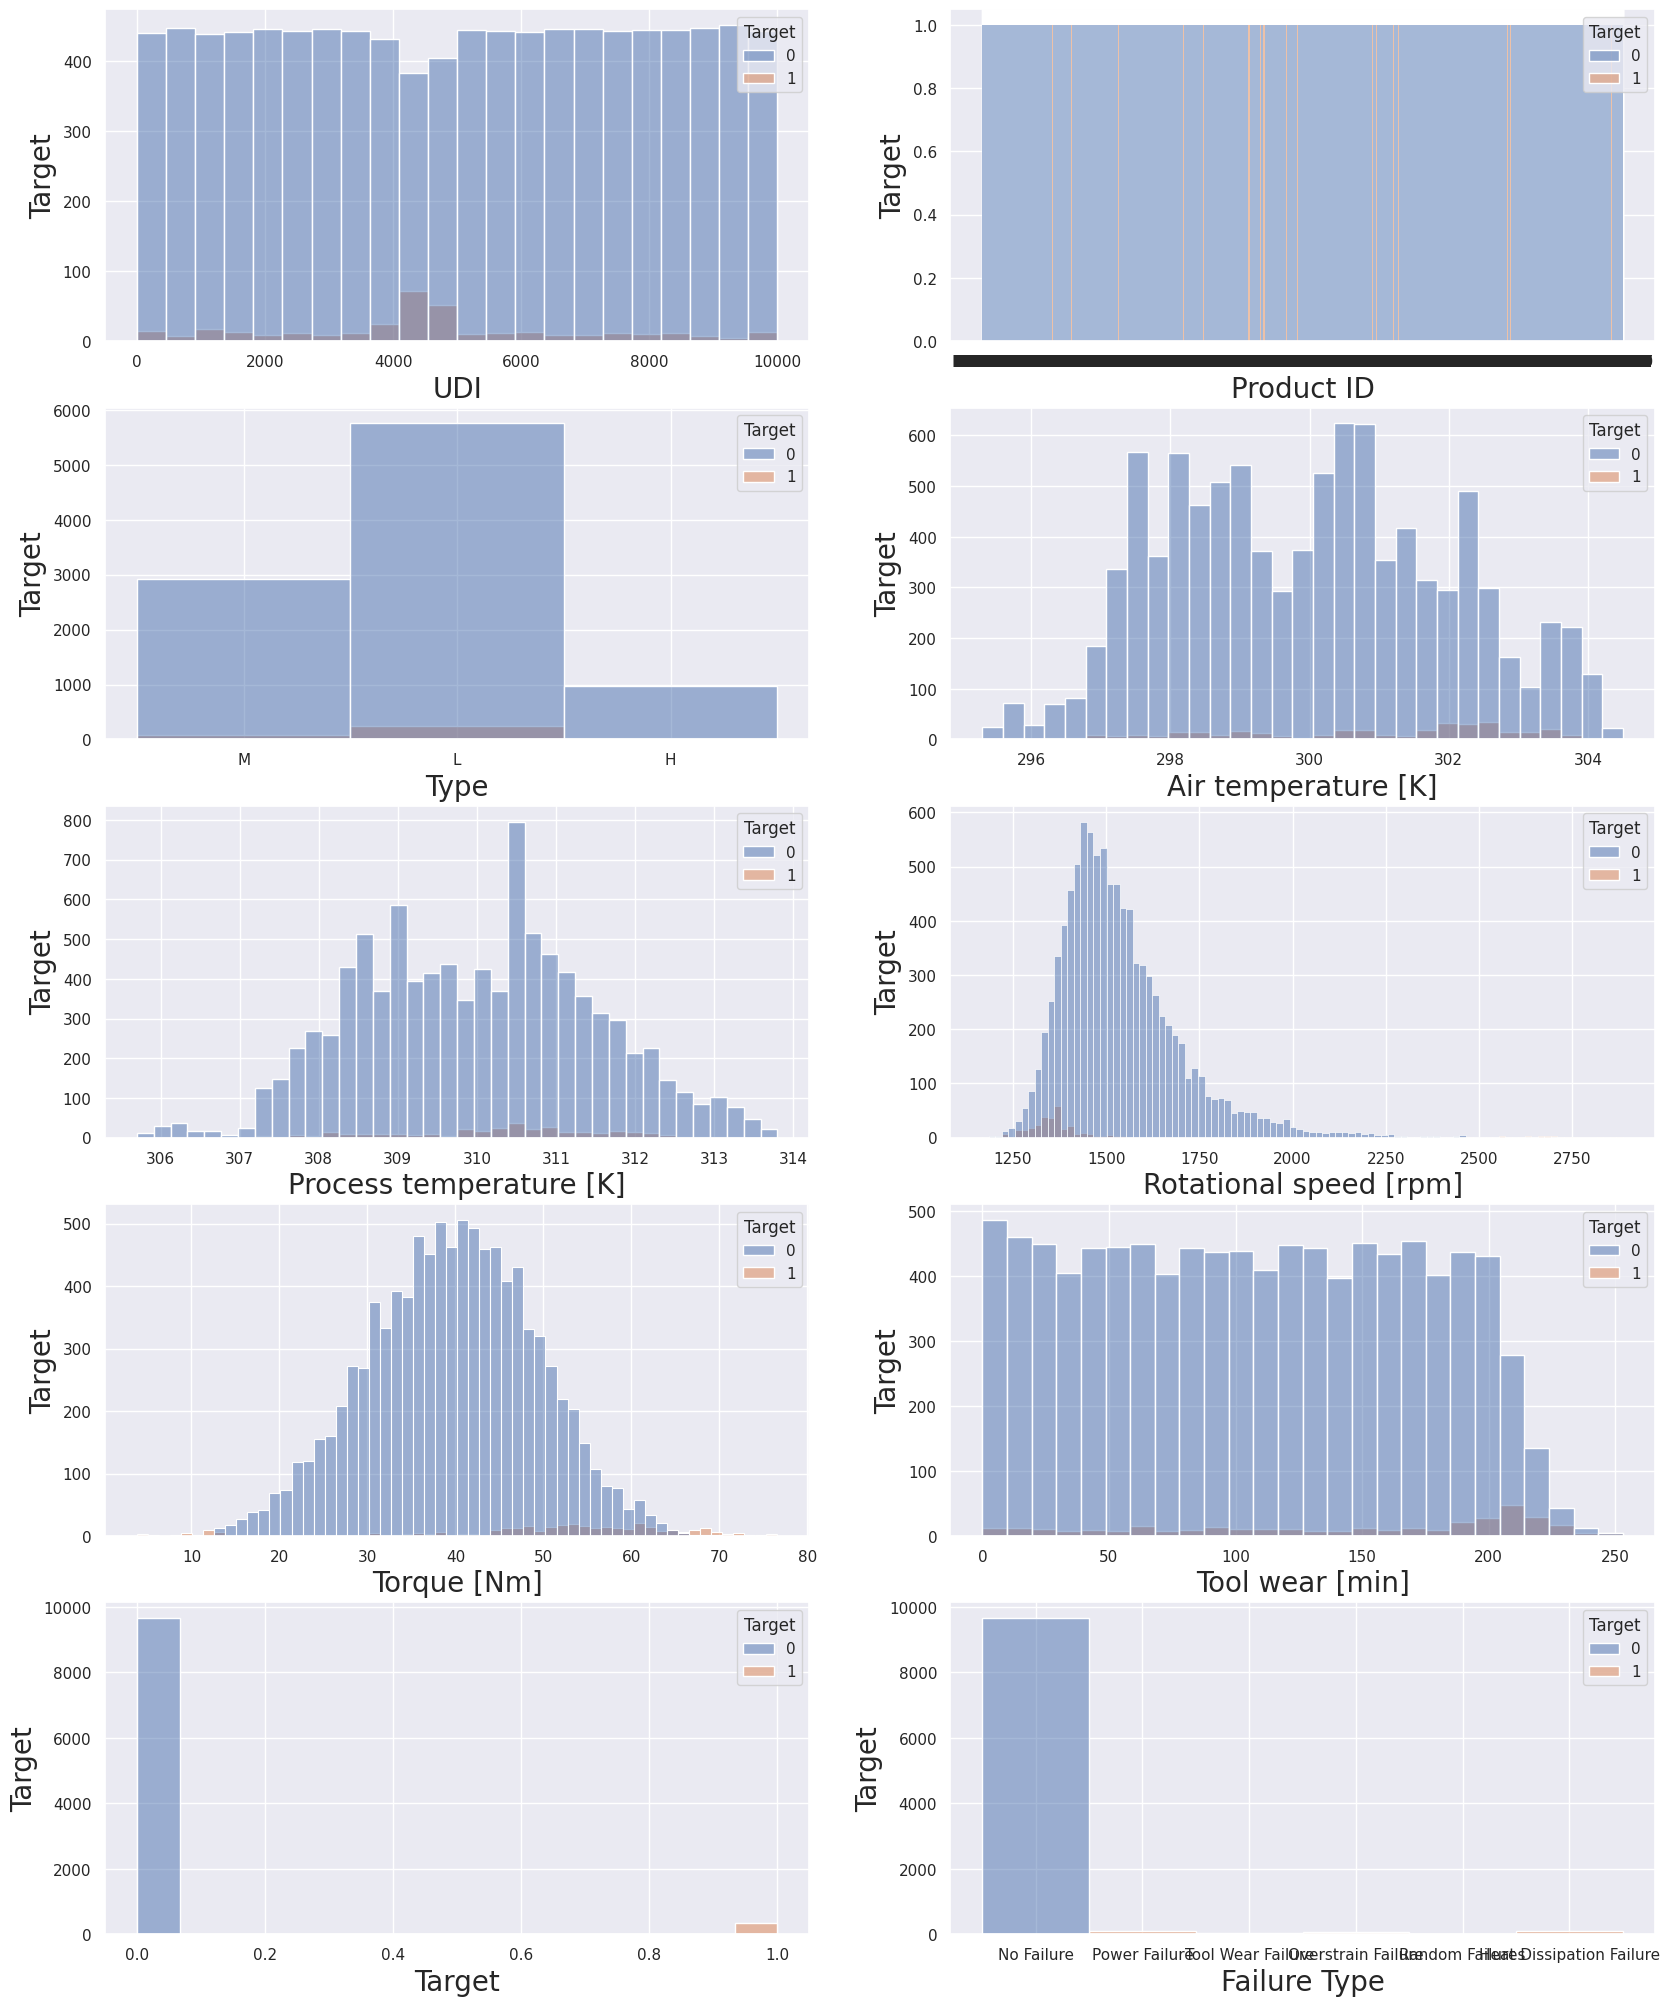

In [88]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in machine.columns:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=machine[column],hue=machine.Target)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Target',fontsize=20)
    plotnumber+=1
plt.show()

<ipython-input-89-e2e4986b48d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = machine, x = "Failure Type", y="Air temperature [K]", palette="RdYlGn",ax=axes[0,0])
<ipython-input-89-e2e4986b48d4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-89-e2e4986b48d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = machine, x = "Failure Type", y="Process temperature [K]", palette="RdYlGn",ax=axes[0,1])
<ipython-input-89-e2e4986b48d4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xt

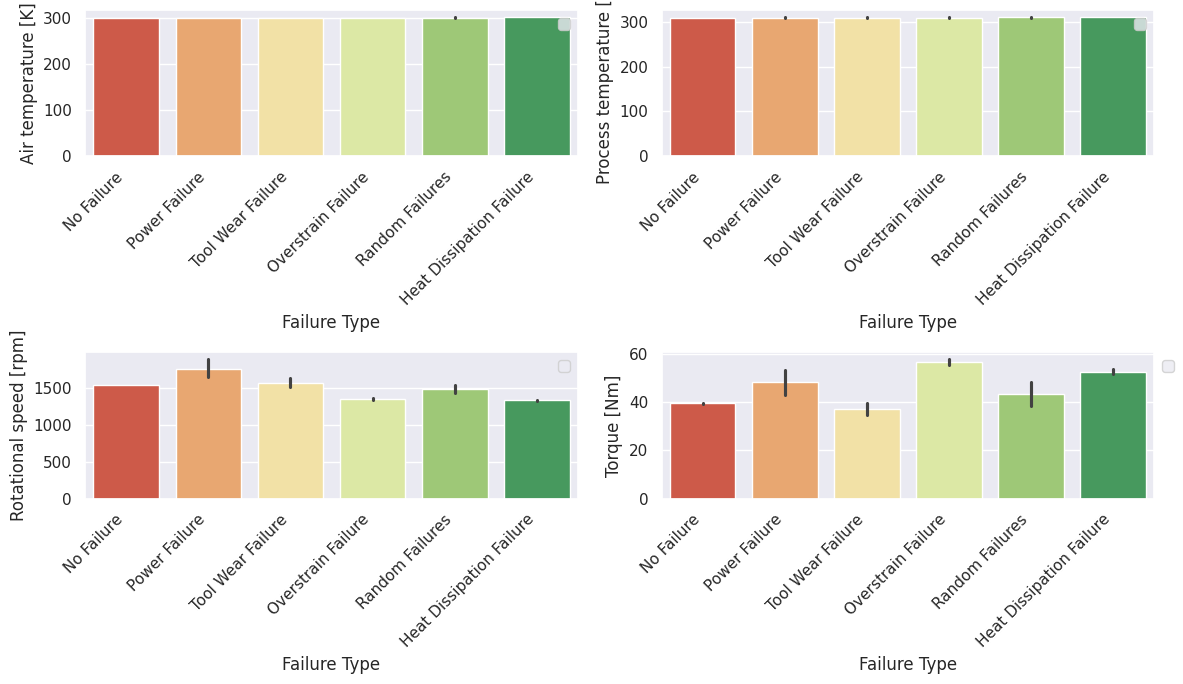

In [89]:
sns.set(style="darkgrid")
label_fontsize = 4

fig, axes = plt.subplots(2, 2, figsize=(12, 7))

sns.barplot(data = machine, x = "Failure Type", y="Air temperature [K]", palette="RdYlGn",ax=axes[0,0])
axes[0,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data = machine, x = "Failure Type", y="Process temperature [K]", palette="RdYlGn",ax=axes[0,1])
axes[0,1].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data = machine, x = "Failure Type", y="Rotational speed [rpm]", palette="RdYlGn",ax=axes[1,0])
axes[1,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data = machine, x = "Failure Type", y="Torque [Nm]", palette="RdYlGn",ax=axes[1,1])
axes[1,1].legend(loc='upper left', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

<ipython-input-90-5c6b8856cdbd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = machine, x = "Failure Type", y="Tool wear [min]",errorbar=None, palette="RdYlGn")


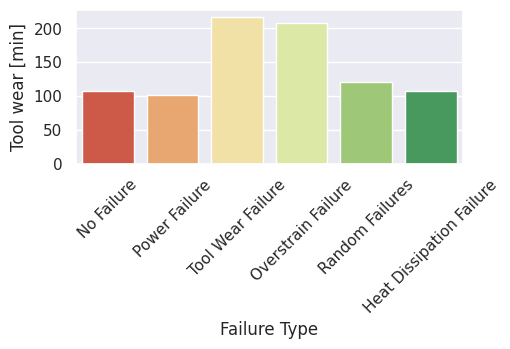

In [90]:
sns.set(style="darkgrid")
label_fontsize = 4

#fig, axes = plt.subplots(2, 2, figsize=(12, 7))
plt.figure(figsize=(5,2))

sns.barplot(data = machine, x = "Failure Type", y="Tool wear [min]",errorbar=None, palette="RdYlGn")
# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [91]:
machinecat = machine.groupby('Type')['Failure Type'].value_counts().unstack().fillna(0)
machinecat

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Type,,,,,,
H,8,979,1,5,4,6
L,74,5757,73,59,12,25
M,30,2916,4,31,2,14


### Multivariate Analysis

Multivariate visualization merupakan jenis visualisasi data untuk menggambarkan informasi yang terdapat dalam lebih dari dua variabel. Jenis visualisasi ini digunakan untuk merepresentasikan hubungan dan pola yang terdapat dalam multidimensional data.

Pada tahap ini, cek rata-rata "Target" terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap "Target".

A. Numerical Features

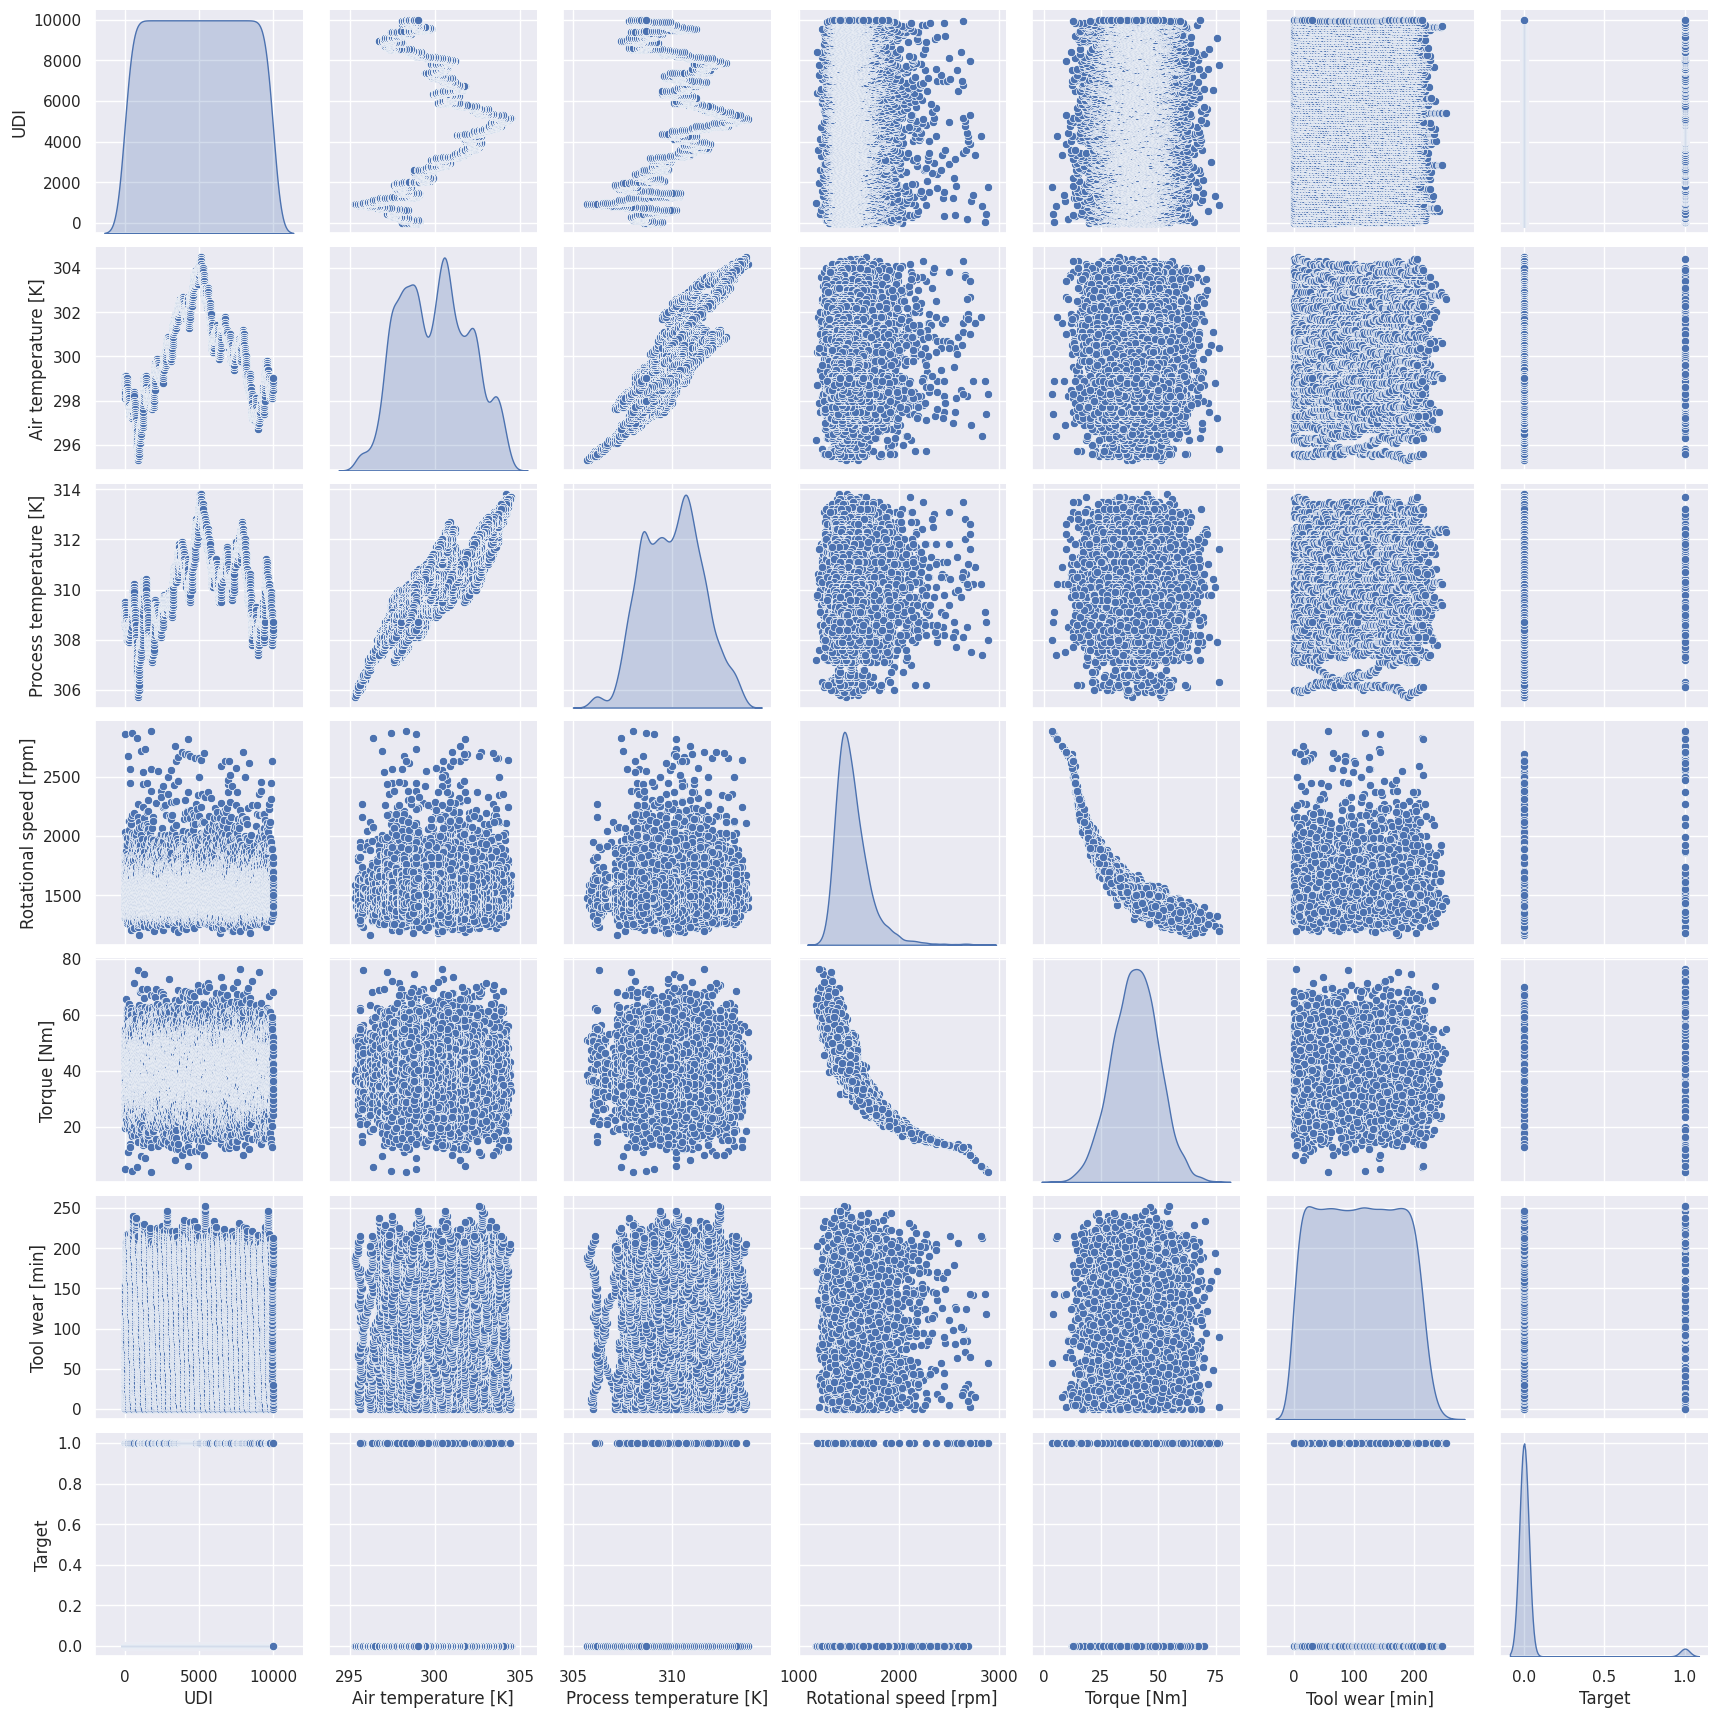

In [92]:
sns.pairplot(machine, diag_kind = 'kde')

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Dari grafik, terlihat plot relasi masing-masing fitur numerik pada dataset. Pada pola sebaran data grafik pairplot sebelumnya, terlihat bahwa 'median_income' memiliki korelasi dengan fitur 'median_house_value'. Sedangkan kedua fitur lainnya terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah

Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().

<ipython-input-93-5b72bbf72997>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = machine.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

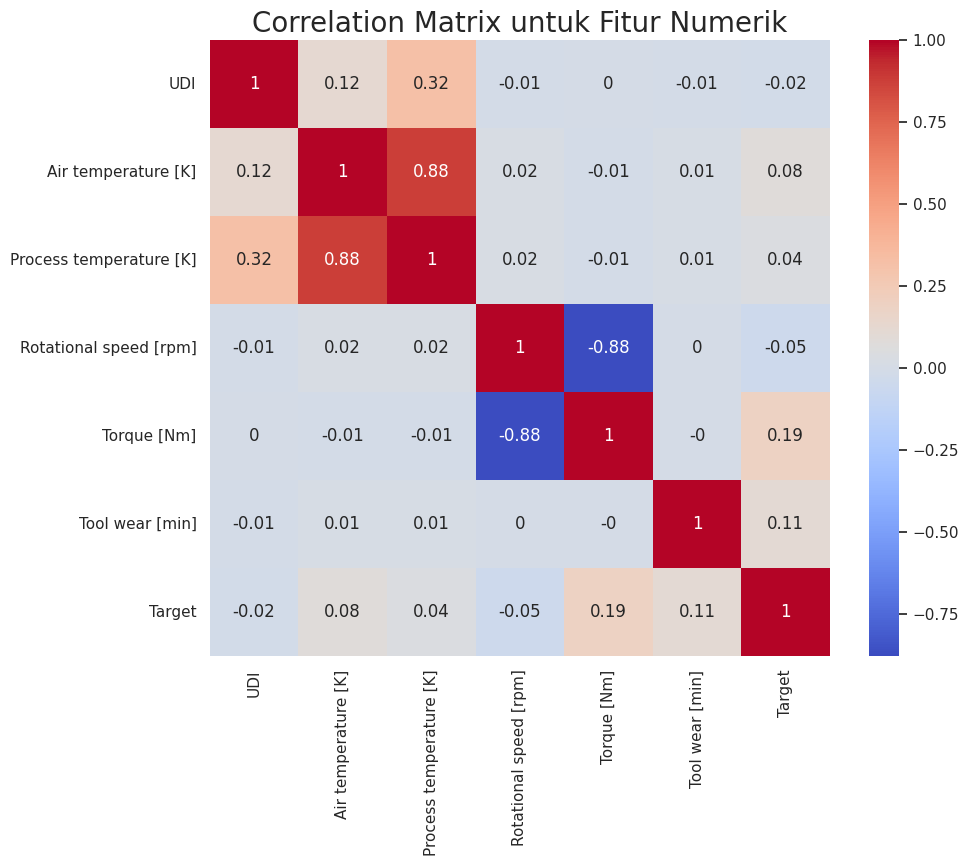

In [93]:
plt.figure (figsize = (10,8))
correlation_matrix = machine.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix untuk Fitur Numerik", size = 20)

Fitur UID serta Product ID memiliki korelasi negatif sehingga, fitur tersebut dapat di-drop.

In [94]:
# Drop ID, UID & Failure Type since they provide no information
machine = machine.drop(['UDI','Product ID'], axis=1)

In [95]:
machine.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


#**DATA PREPARATION**

Data Peparation merupakan tahapan penting dalam proses pengembangan model machine learning. Pada tahap ini lakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, dan feature engineering.

Pada bagian ini lakukan empat tahap persiapan data, yaitu:

- Encoding fitur kategori.
- Pembagian dataset dengan fungsi train_test_split dari library sklearn.
- Standarisasi.

## Encoding

In [96]:
from sklearn.preprocessing import  OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
machine['Failure Type_Encoded'] = label_encoder.fit_transform(machine['Failure Type'])

machine['Failure Type_Encoded'].value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type_Encoded, dtype: int64

In [97]:
machine.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type_Encoded
0,M,298.1,308.6,1551,42.8,0,0,No Failure,1
1,L,298.2,308.7,1408,46.3,3,0,No Failure,1
2,L,298.1,308.5,1498,49.4,5,0,No Failure,1
3,L,298.2,308.6,1433,39.5,7,0,No Failure,1
4,L,298.2,308.7,1408,40.0,9,0,No Failure,1


In [98]:
# Perform one-hot encoding with drop_first=True
machine = pd.concat([machine, pd.get_dummies(machine['Failure Type'], prefix='Failure Type')],axis=1)
machine.drop(['Failure Type'], axis=1, inplace=True)
machine.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type_Encoded,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,M,298.1,308.6,1551,42.8,0,0,1,0,1,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,1,0,1,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,1,0,1,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,1,0,1,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,1,0,1,0,0,0,0


In [99]:
machine['Type'] = machine['Type'].map({
    'L': 1,
    'M': 2,
    'H': 3
})

machine['Type'].value_counts()

1    6000
2    2997
3    1003
Name: Type, dtype: int64

In [100]:
machine.head(161)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type_Encoded,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,2,298.1,308.6,1551,42.8,0,0,1,0,1,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,1,0,1,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,1,0,1,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,1,0,1,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2,298.4,308.1,1495,46.0,203,0,1,0,1,0,0,0,0
157,3,298.4,308.2,1478,43.5,206,0,1,0,1,0,0,0,0
158,2,298.4,308.2,1499,40.0,211,0,1,0,1,0,0,0,0
159,1,298.4,308.2,1471,47.0,214,0,1,0,1,0,0,0,0


## Train-Test Split

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus diakukan sebelum membuat model. Hal ini diperlukan untuk menguji seberapa baik generalisasi model terhadap data baru.
Pada model ini, proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn.

In [101]:
from sklearn.model_selection import train_test_split

X = machine.drop(['Target', 'Failure Type_Encoded', 'Failure Type_Heat Dissipation Failure','Failure Type_No Failure', 'Failure Type_Overstrain Failure', 'Failure Type_Power Failure', 'Failure Type_Random Failures', 'Failure Type_Tool Wear Failure' ], axis = 1)
y = machine['Failure Type_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123, stratify=y)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9000, 6), (1000, 6), (9000,), (1000,))

In [103]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10000
Total # of sample in train dataset: 9000
Total # of sample in test dataset: 1000


## Standarisasi

Algoritma machine learning memiliki performa lebih baik dan lebih cepat ketika dimodelkan pada data dengan yang mendekati distribusi normal. Scaling dan standarisasi merupakan metode yang dapat dilakukan

Untuk fitur numerik, tidak dilakukan proses transformasi dengan one-hot-encoding seperti pada fitur kategori. Yang digunakan untuk standarisasi adalah StandarScaler.

StandardScaler merupakan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [104]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Air temperature [K]',	'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4343,0.846409,-0.139919,-0.266994,-0.068583,0.090697
9166,-1.200322,-0.949174,-0.832232,1.345764,1.049185
2592,-0.551358,-0.949174,0.001634,0.543298,-1.637724
912,-2.198728,-2.702560,0.169527,0.041756,1.033472
1736,-0.800960,-1.421239,0.029616,-0.409631,0.373529


In [105]:
X_train[numerical_features].describe().round(4)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,9000.0000,9000.0000,9000.0000,9000.0000,9000.0000
mean,-0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001
min,-2.3485,-2.9049,-2.0746,-3.6295,-1.7006
25%,-0.8509,-0.8143,-0.6420,-0.6805,-0.8678
50%,0.0477,0.0624,-0.1942,0.0117,-0.0036
75%,0.7466,0.7368,0.4046,0.6737,0.8606
max,2.1943,2.5576,7.5400,3.6729,2.2748


# **MODEL DEVELOPMENT**

Model development adalah tahapan dimana digunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding Pada tahap ini, dibuat model machine learning dengan tiga algoritma. Kemudian, evaluasi performa masing-masing algoritma dan pilih algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan digunakan, antara lain:

Regresi Linier
Regresi Ridge
Random Forest
Random Forest dengan Tuning GridSearchCV

In [106]:
#Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression', 'RidgeRegression', 'RandomForest', 'RandomForest_GridSearchCV'])

## 1. Regresi Linear

In [107]:
#REGRESI LINEAR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

LR = LinearRegression()
LR.fit(X_train, y_train)
print ('Coefficients: ', LR .coef_)
print ('Intercept: ', LR .intercept_)
models.loc['train_mse','Linear Regression'] = mean_squared_error(y_pred = LR.predict(X_train), y_true=y_train)

Coefficients:  [ 0.00044297 -0.04162307  0.03473977  0.17595093  0.16687471  0.04284542]
Intercept:  1.0383355884104262


## 2. Ridge Regression

In [108]:
#RIDGE REGRESSION
from sklearn.linear_model import Ridge
RR = Ridge()
RR.fit(X_train, y_train)
models.loc['train_mse','Ridge Regression'] = mean_squared_error(y_pred = RR.predict(X_train), y_true=y_train)
print ('Coefficients: ', RR .coef_)
print ('Intercept: ', RR .intercept_)

Coefficients:  [ 0.00044186 -0.04158683  0.03470501  0.17579878  0.16672307  0.04283956]
Intercept:  1.038337265514018


##3. Random Forest Regression

In [109]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor

#buat model prediksi
RF1 = RandomForestRegressor(random_state=100)
RF1.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF1.predict(X_train), y_true=y_train)

##4. Random Forest dengan Tuning GridSearchCV

Dilakukan eksperimen dengan menggunakan GridSearchCV untuk melakukan hyperparameter tuning pada Random Forest untuk meningkatkan model. Berikut adalah hyperparameter yang digunakan:

- n_estimator: jumlah trees (pohon) di forest
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- min_samples_split menentukan jumlah minimum sampel yang diperlukan untuk memisahkan simpul internal
- min_samples_leaf menentukan jumlah minimum sampel yang diperlukan untuk berada di simpul daun

In [110]:
params = {'n_estimators' : [50,80,100],
          'max_depth' : [3,5,10],
           'min_samples_split':[2,3,4],
            'min_samples_leaf': [2,3,4]}

In [111]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator= RF1 , param_grid=params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             scoring='r2')

In [112]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [113]:
RF2 = RandomForestRegressor(max_depth =10,min_samples_leaf = 4,min_samples_split = 2,n_estimators = 100,random_state=100)
RF2.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF2.predict(X_train), y_true=y_train)

# EVALUASI MODEL

Setelah model selesai dilatih dengan 4 algoritma, lihat performa model dengan menggunakan metrik evaluasi

In [114]:
def metrics(name,key,arg):
    print('Name of the model: ',name)
    print('R^2 of the model:',r2_score(key,arg))
    print('MSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))
    print('......')

In [115]:
y_LR = LR.predict(X_test)
y_RR = RR.predict(X_test)
y_RF1 = RF1.predict(X_test)
y_RF2 = RF2.predict(X_test)

metrics('Performa Model 1', y_test, y_LR)
metrics('Performa Model 2', y_test, y_RR)
metrics('Performa Model 3', y_test, y_RF1)
metrics('Performa Model 4', y_test, y_RF2)

Name of the model:  Performa Model 1
R^2 of the model: -570382.6973365095
MSE of the model: 282.05770282124723
MAE of the model: 280.3345850405439
......
Name of the model:  Performa Model 2
R^2 of the model: -569403.1976127202
MSE of the model: 281.8154149063259
MAE of the model: 280.0937710596088
......
Name of the model:  Performa Model 3
R^2 of the model: -17.320442503889478
MSE of the model: 1.5985358926217452
MAE of the model: 1.58654
......
Name of the model:  Performa Model 4
R^2 of the model: -24.351213845094517
MSE of the model: 1.8804153679174018
MAE of the model: 1.8667685602730606
......


Sekarang, setelah model selesai dilatih, lakukan proses scaling terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan bisa dilakukan evaluasi.

Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

In [116]:
numerical_features = ['Air temperature [K]',	'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

In [117]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

 Evaluasi model yang ada dengan metrik MSE

In [118]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','RR','RF1', 'RF2'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': LR, 'RR': RR, 'RF1': RF1, 'RF2': RF2}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
LR,0.000135,0.000132
RR,0.000135,0.000132
RF1,0.000014,0.000116
RF2,0.000065,0.000102


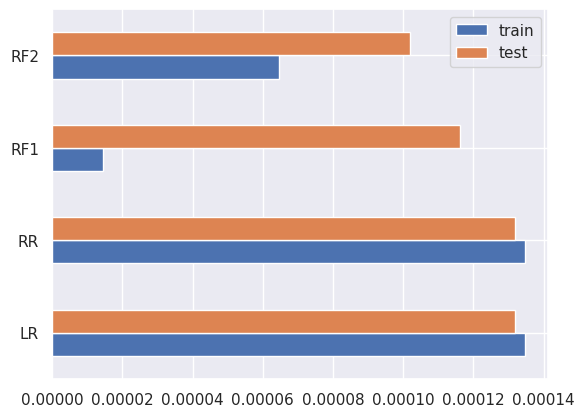

In [119]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [120]:
prediksi = X_test.iloc[:1000].copy()
pred_dict = {'y_true':y_test[:1000]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(0)

pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_RR,prediksi_RF1,prediksi_RF2
2161,1,1.0,1.0,1.0,1.0
2103,1,1.0,1.0,1.0,1.0
2914,1,1.0,1.0,1.0,1.0
6240,1,1.0,1.0,1.0,1.0
9354,1,1.0,1.0,1.0,1.0
...,...,...,...,...,...
2693,1,1.0,1.0,1.0,1.0
6586,1,1.0,1.0,1.0,1.0
8536,1,1.0,1.0,1.0,1.0
1221,4,1.0,1.0,1.0,1.0
